# Rossman Dataset

Accurately forecasting sales is one of the most difficult challenges faced by retailers
worldwide, as sales are influenced by many factors, such as promotions, competition, 
holidays, seasonality and locality. In this project, the overall business objective is to 
predict 6 weeks of daily sales for 1,115 drug stores located across Germany, as 
reliable sales forecasts enable store managers to increase the overall productivity and 
profitability of the retail business and improve their customer satisfaction.

However, the challenges in this sales forecasting problem are to take into account 
various types of factors and to deal with missing data from historical records. Thus, 
you are commissioned to get the historical dataset fully pre-processed for reliable and 
accurate forecasting, and the major data preparation tasks, like integration, 
visualisation, cleaning and transformation, should be explored. The available datasets
are briefly introduced below.

### Dataset store.csv:
- Store: the anonymised store number
- StoreType: 4 different store models: a, b, c, d
- Assortment: an assortment level -> a = basic, b = extra, c = extended
- CompetitionDistance: distance in meters to the nearest competitor store
- CompetitionOpenSinceMonth: the approximate month of the time when the nearest competitor was opened
- CompetitionOpenSinceYear: the approximate year of the time when the nearest competitor was opened
- Promo2: a continuing and consecutive promotion, e.g. a coupon based mailing campaign, for some stores: 0 = store is not participating, 1 = store is participating
- Promo2SinceWeek: a calendar week when the store started participating in Promo2
- Promo2SinceYear: the year when the store started participating in Promo2
- PromoInterval: the consecutive intervals in which Promo2 is restarted, naming the months the promotion is started anew. e.g. "Feb, May, Aug, Nov" means each round of the coupon based mailing campaign starts in February, May, August, November of any given year for that store, as the coupons, mostly for a discount on certain products are usually valid for three months, and a new round of mail needs to be sent to customers just before those coupons have expired

### Evaluation of Forecasting Accuracy
In this project the following Root Mean Square Percentage Error (RMSPE) or other appropriate errors can be used to evaluate the forecasting accuracy:

RMSPE = sqrt(1/n * SUM((yi - estyi)/yi)^2)

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\msala\AppData\Local\Temp\ipykernel_26628\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
store = pd.read_csv("store.csv")
store.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [3]:
store.shape

(1115, 10)

In [4]:
store.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


There are 1115 Stores, there are 1112 stores that have competition nearby.
Promo2 although has 1115 count we can tell from Promo2SinceWeek and Promo2SinceYear that only 571 stores have promotions. And since the data in Promo2SinceWeek and Promo2SinceYear are only missing if there was a 0 in Promo2 we can consider this data as MNAR (Missing Not at Random)

In [5]:
for columns in store.columns:
    print(str(columns) + " : " + str(store[columns].nunique()))

Store : 1115
StoreType : 4
Assortment : 3
CompetitionDistance : 654
CompetitionOpenSinceMonth : 12
CompetitionOpenSinceYear : 23
Promo2 : 2
Promo2SinceWeek : 24
Promo2SinceYear : 7
PromoInterval : 3


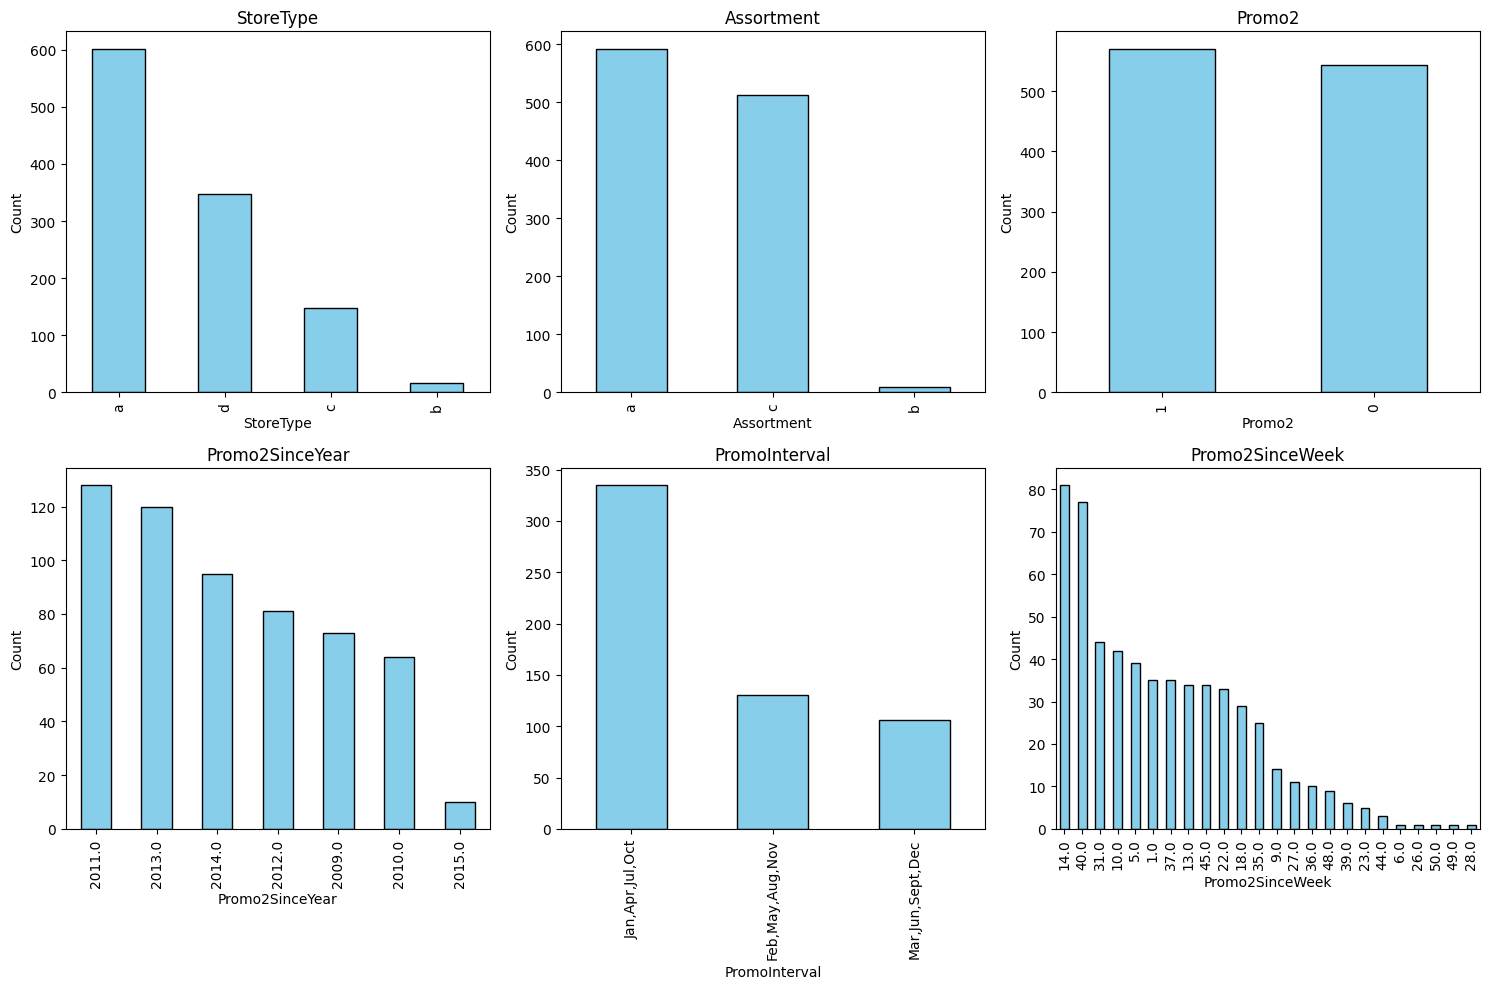

In [6]:
columns_with_few_nunique = ["StoreType", "Assortment", "Promo2", "Promo2SinceYear", "PromoInterval", "Promo2SinceWeek"]

# print(store["StoreType"].value_counts())

# for column in columns_with_few_nunique:
#     store[column].value_counts().plot(kind = 'bar')

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))

axes = axes.flatten()

for i, column in enumerate(columns_with_few_nunique):
    value_counts = store[column].value_counts()
    
    value_counts.plot(kind = "bar", ax = axes[i], color = 'skyblue', edgecolor = 'black')
    
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    
plt.tight_layout()
plt.show()

Store Type A is most common, Store Type D is the next most common, Store Type C is 3rd Most Common and Store Type B has the least amount.

Assortment A and C are high where as very few Assortment Type B.

Almost an equal split between Stores with Promos and stores without promos. There are slightly more stores with promos

Promo2Since Year tells us that there are a lot more stores who started Promos since 2011 than any of the other years, with 2015 being the lowest.

Jan, Apr, Jul, Oct are the most common Promo Intervals out of the 571 stores that have Promos.

Text(0.5, 1.0, 'Competitor Distance Distribution in km')

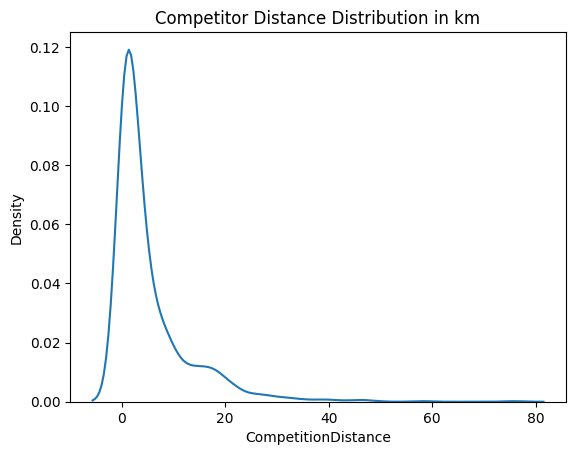

In [7]:
sns.kdeplot(store['CompetitionDistance']/1000 )
plt.title("Competitor Distance Distribution in km")

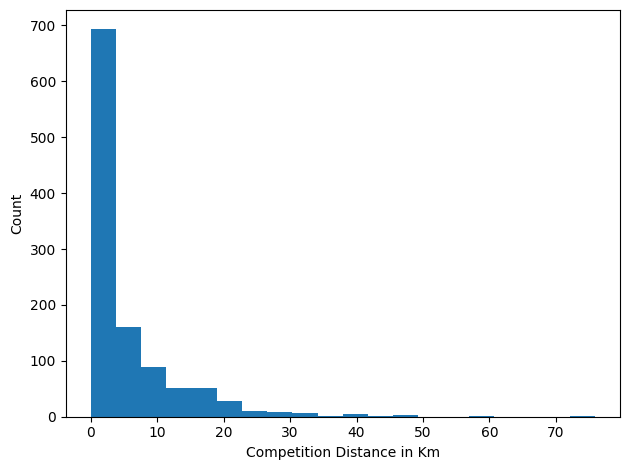

In [8]:
plt.hist(store["CompetitionDistance"]/1000, bins = 20)
plt.xlabel("Competition Distance in Km")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

We can tell from this that the majority of the competitors are within 5-10 kms away from the store.

We can see that the data is significantly right skewed. We can use Log to make it more Gaussian in nature.

plt.hist(np.log(store["CompetitionDistance"]), bins = 20)
plt.xlabel("Log of Competition Distance")
plt.tight_layout()
plt.show()

### Dataset train.csv and test.csv:
- Store: The anonymised store number
- DayOfWeek: the day of the week: 1 = Monday, 2 = Tuesday, ...
- Date: the given date
- Sales: the turnover on a given day
- Customers: the number of customers on a given day
- Open: an indicator for whether the store was open on that day: 0 = closed, 1 = open
- Promo: indicates whether a store is running a store-specific promo on that day
- StateHoliday: indicates a state holiday. Normally all stores, with a few exceptions are closed on state holiday. Note that all schools are closed on public holidays and weekends. a= public holiday, b = Easter holiday, c = Christmas, 0 = none
- SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools

In [9]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

C:\Users\msala\AppData\Local\Temp\ipykernel_26628\3799102436.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


In [10]:
#Parsing Date column
def split_date(df):
    df['Date']= pd.to_datetime(df.Date, dayfirst= True)
    df['Year']= df.Date.dt.year
    df['Month']= df.Date.dt.month
    df['Day']= df.Date.dt.day
    df['WeekofYear']=df.Date.dt.isocalendar().week

In [11]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [12]:
test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


From just looking at the first 5 rows of both train and test dataset, we will be forecasting the Sales and Customers number based on predictions from the train set on to the test set

In [13]:
merged_train_and_store = train.merge(store, how = "left", on = "Store")

In [14]:
split_date(merged_train_and_store)

In [15]:
merged_train_and_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekofYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


In [16]:
merged_train_and_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [17]:
print(train.shape, merged_train_and_store.shape)

(1017209, 9) (1017209, 22)


In [18]:
not_open = merged_train_and_store[merged_train_and_store.Open == 0]

print(not_open.shape, (not_open.shape[0]/merged_train_and_store.shape[0])*100)

(172817, 22) 16.989330609540417


We can see that about 17 percent of the data includes data of when stores are not open. This is a relatively small amount compared to Open, and this will need to be taken into account when training our dataset

In [19]:
stores_with_promo = merged_train_and_store[merged_train_and_store.Promo == 1]

print(stores_with_promo.shape, (stores_with_promo.shape[0]/merged_train_and_store.shape[0])*100)

(388080, 22) 38.151451668241236


In [20]:
stores_with_promo2 = merged_train_and_store[merged_train_and_store.Promo2 == 1]

print(stores_with_promo2.shape, (stores_with_promo2.shape[0]/merged_train_and_store.shape[0])*100)

(509178, 22) 50.05637976069814


We can see that about 38 percent of stores run store specific promos on particular days where as 50 percent of the stores run Promo2

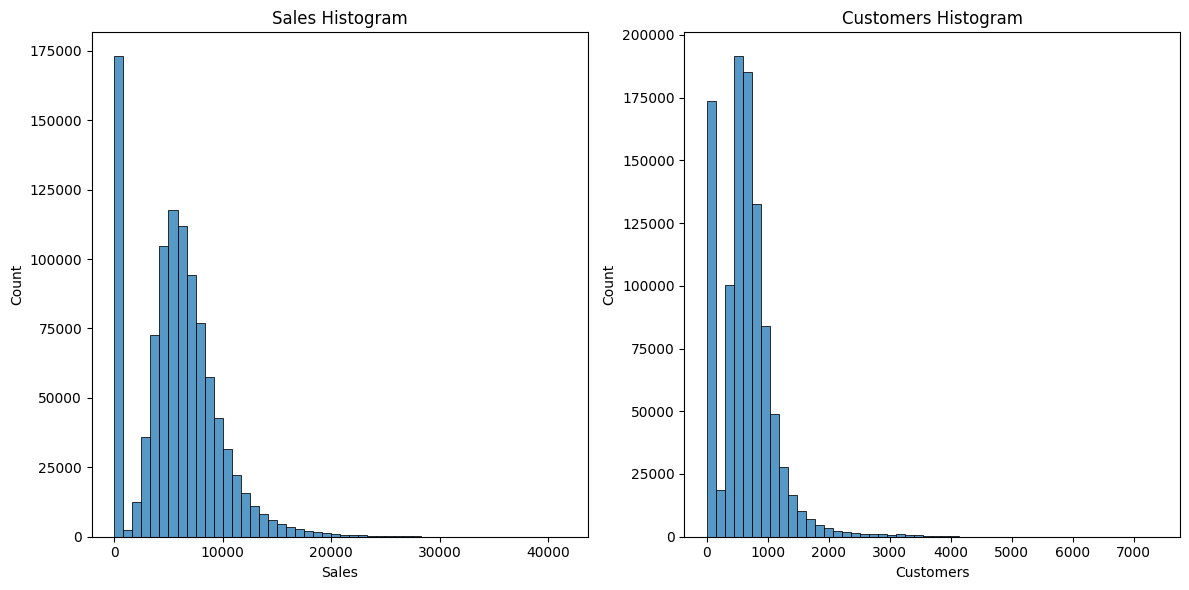

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
sns.histplot(merged_train_and_store, x = "Sales", ax = axes[0], bins = 50)
axes[0].set_title('Sales Histogram')

# Plot 2
sns.histplot(merged_train_and_store, x = "Customers", ax = axes[1], bins = 50)
axes[1].set_title('Customers Histogram')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

looking at the graph we can see that there are a lot of values where there were 0 Sales and similarly a lot of values where customers are 0. In the next snippet of code I will try to see how many instances there are in the code where the value of sales is 0

We can also see that majority of the Sales fall between 3000 - 10000, and similarly majority of the customers lie between 200 - 1200 customers.

In [22]:
zero_sales = merged_train_and_store[merged_train_and_store.Sales == 0]

zero_sales.shape

(172871, 22)

In [23]:
zero_customers = merged_train_and_store[merged_train_and_store.Customers == 0]

zero_customers.shape

(172869, 22)

In [24]:
percentage_of_zero_sales = zero_sales.shape[0]/merged_train_and_store.shape[0] * 100
percentage_of_zero_customers = zero_customers.shape[0]/merged_train_and_store.shape[0] * 100

print(percentage_of_zero_sales, percentage_of_zero_customers)

16.994639253093514 16.99444263666562


Approximately 17 percent of the dataset has 0 Customers and 0 Sales

In [25]:
# Merge DataFrames based on all columns
merged_df = pd.merge(zero_sales, zero_customers, how='inner')

# Check the number of common instances
common_instances_count = len(merged_df)

print(f"Number of common instances: {common_instances_count}")

Number of common instances: 172869


We know from this that besides for 2 instances where zero sales does not equal zero customers, the rest of the dataset matches each other. So we can confirm that zero customers leads zero sales.

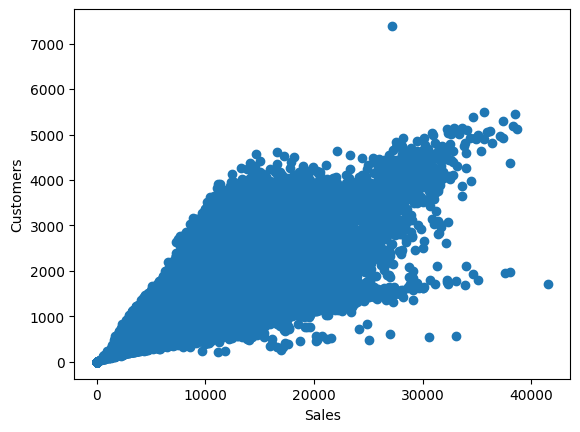

In [26]:
plt.scatter(data = merged_train_and_store, x = "Sales", y = "Customers")
plt.xlabel("Sales")
plt.ylabel("Customers")
plt.show()

In [27]:
print(np.corrcoef(x = merged_train_and_store.Sales, y = merged_train_and_store.Customers))

[[1.         0.89471077]
 [0.89471077 1.        ]]


We can see that Sales and Customers are very highly correlated so we know that when we will be creating our machine learning models we need to check the correlation remains within the same amounts. 

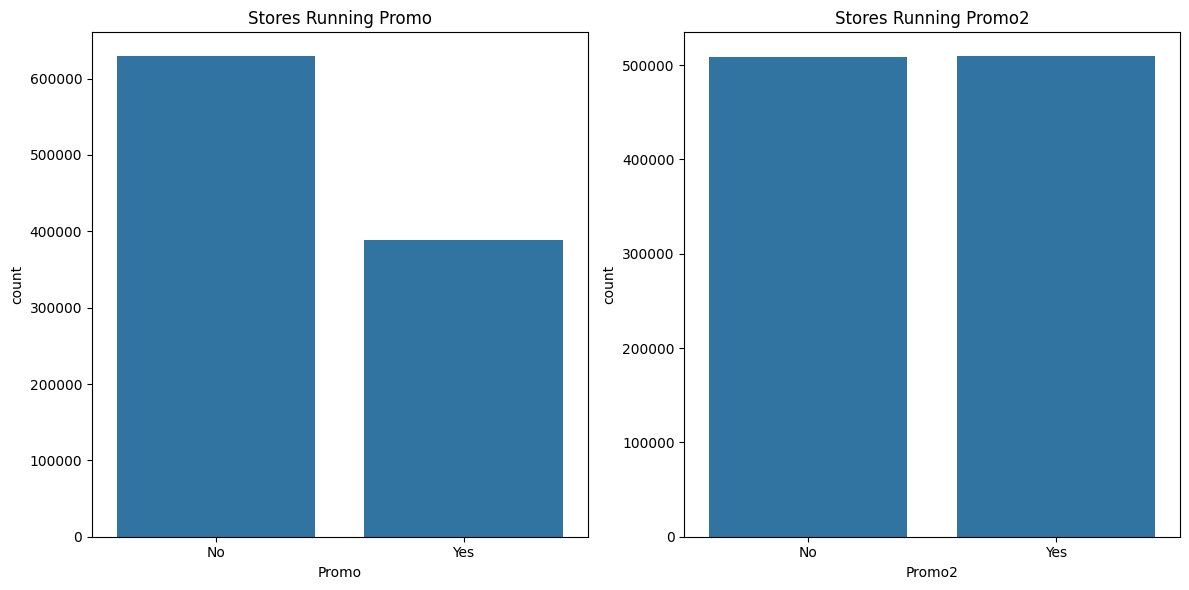

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
sns.countplot(merged_train_and_store, x = "Promo", ax = axes[0])
axes[0].set_title('Stores Running Promo')
axes[0].set_xticks([0, 1])  
axes[0].set_xticklabels(['No', 'Yes'])  

# Plot 2
sns.countplot(merged_train_and_store, x = "Promo2", ax = axes[1])
axes[1].set_title('Stores Running Promo2')
axes[1].set_xticks([0, 1]) 
axes[1].set_xticklabels(['No', 'Yes']) 

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

There are a lot more instances of Stores not participating in in store promotions in comparison to Promo2 which seems to be evenly split.

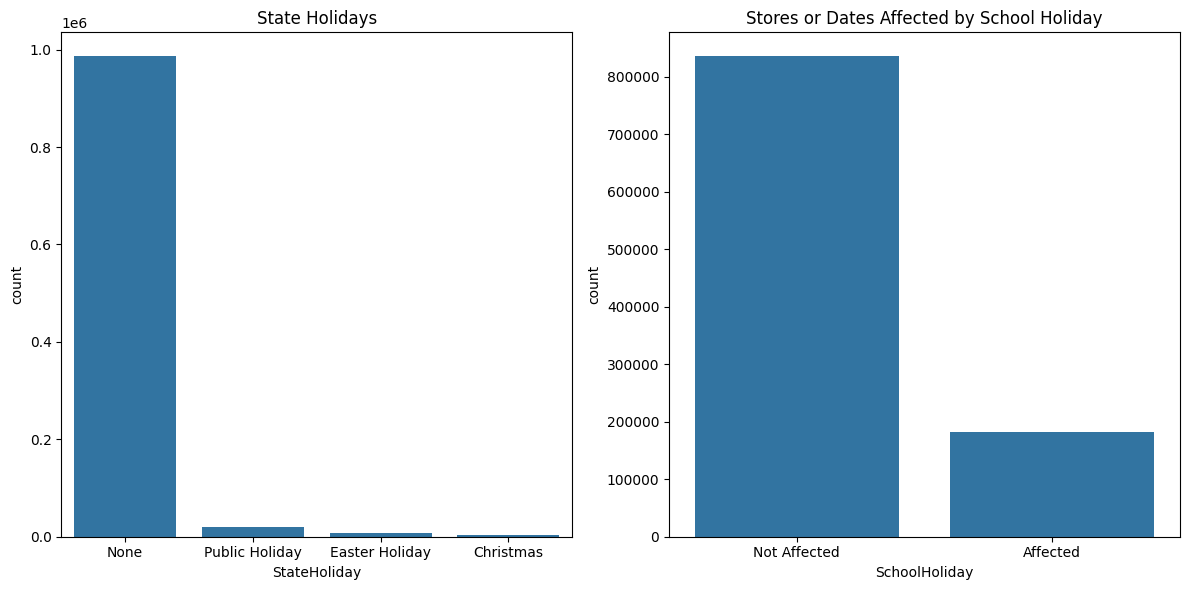

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
sns.countplot(merged_train_and_store, x = "StateHoliday", ax = axes[0])
axes[0].set_title('State Holidays')
axes[0].set_xticks(['a', 'b', 'c', '0'])  
axes[0].set_xticklabels(['Public Holiday', 'Easter Holiday','Christmas', 'None' ])  


# Plot 2
sns.countplot(merged_train_and_store, x = "SchoolHoliday", ax = axes[1])
axes[1].set_title('Stores or Dates Affected by School Holiday')
axes[1].set_xticks([0, 1]) 
axes[1].set_xticklabels(['Not Affected', 'Affected']) #SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

We can see that Majority of the dataset contains data when there are no state holidays. We can also say that a significant number of stores will not be impacted by the School Public Holidays.

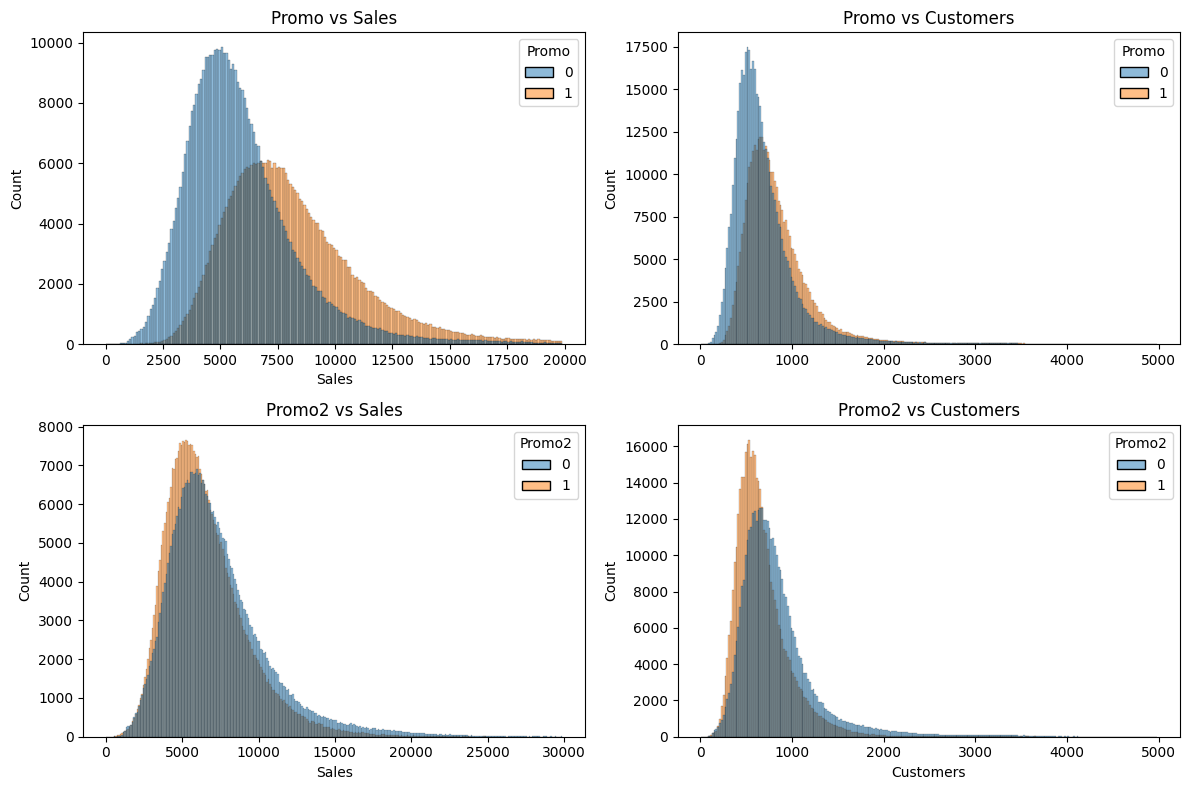

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1
sns.histplot(data=merged_train_and_store, hue='Promo', x='Sales', ax=axes[0, 0], bins = range(10, 20000 , 100))
axes[0, 0].set_title('Promo vs Sales')

# Plot 2
sns.histplot(data=merged_train_and_store, hue='Promo', x='Customers', ax=axes[0, 1], bins = range(5, 5000 , 20))
axes[0, 1].set_title('Promo vs Customers')

# Plot 3
sns.histplot(data=merged_train_and_store, hue='Promo2', x='Sales', ax=axes[1, 0], bins = range(10, 30000 , 100))
axes[1, 0].set_title('Promo2 vs Sales')

# Plot 4
sns.histplot(data=merged_train_and_store, hue='Promo2', x='Customers', ax=axes[1, 1], bins = range(5, 5000 , 20))
axes[1, 1].set_title('Promo2 vs Customers')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

We can see that the Promo led to more sales and more customers, whereas stores with Promo2 appear to have roughly stayed within the same range

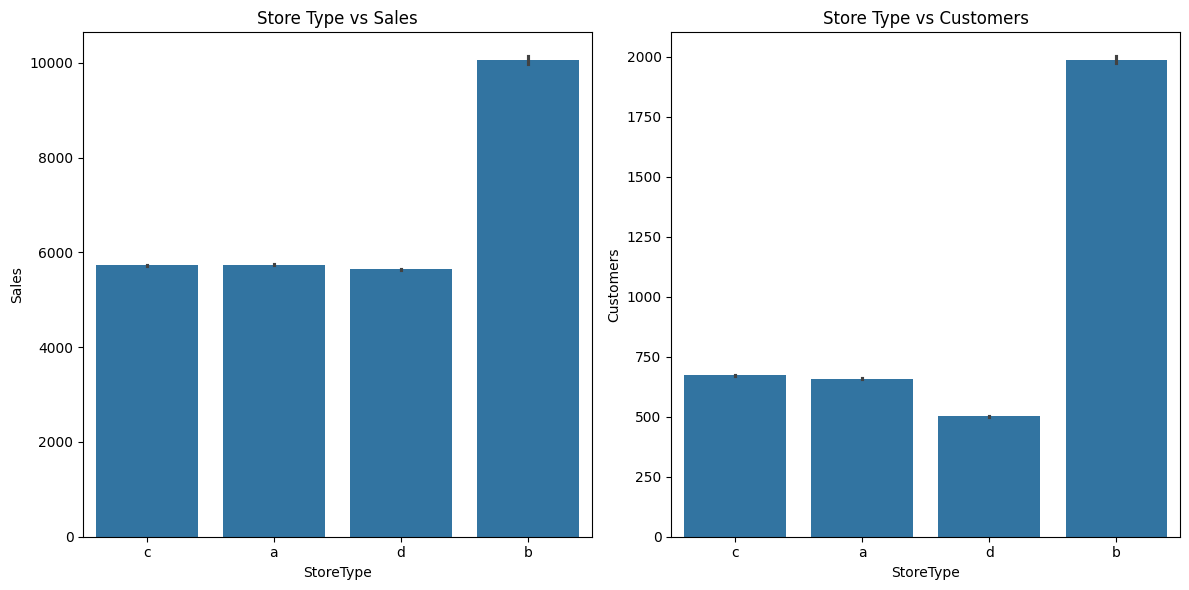

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
sns.barplot(data=merged_train_and_store, x='StoreType', y='Sales', ax=axes[0])
axes[0].set_title('Store Type vs Sales')

# Plot 2
sns.barplot(data=merged_train_and_store, x='StoreType', y='Customers', ax=axes[1])
axes[1].set_title('Store Type vs Customers')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

We can tell that Store Type B has gets overall more sales and more customers

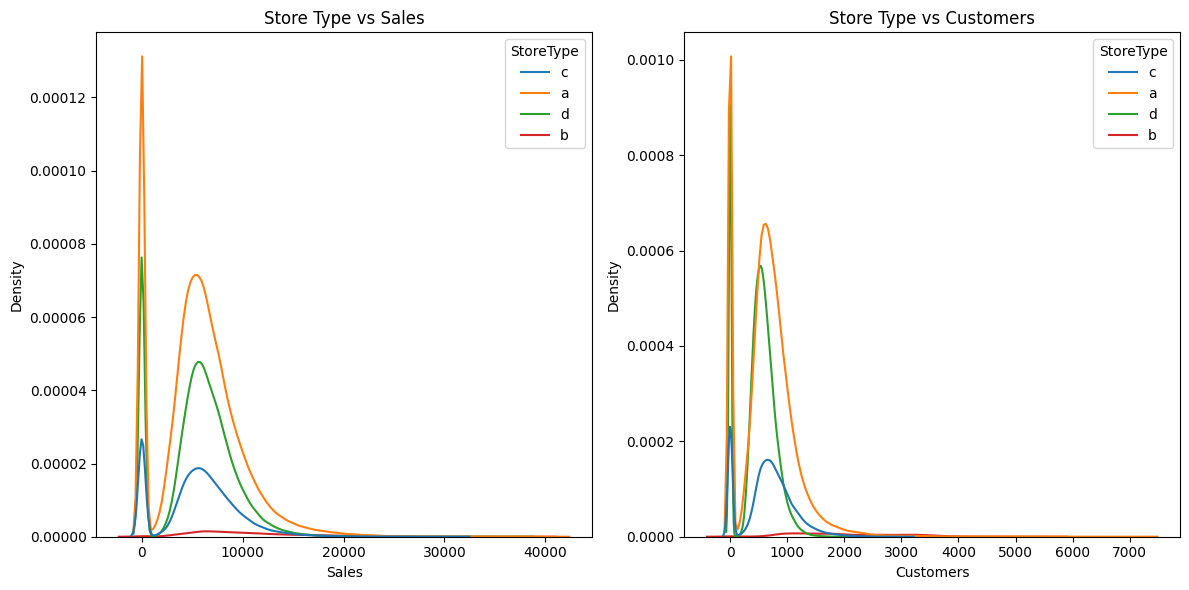

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
sns.kdeplot(data=merged_train_and_store, hue='StoreType', x='Sales', ax=axes[0])
axes[0].set_title('Store Type vs Sales')

# Plot 2
sns.kdeplot(data=merged_train_and_store, hue='StoreType', x='Customers', ax=axes[1])
axes[1].set_title('Store Type vs Customers')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

We can see that b hardly has a peak where as all of the others have a higher peak between 2000 - 10000 for sales and 200 - 1000 for customers.

Type A has a higher peak suggesting that there are more sales within that range per day.

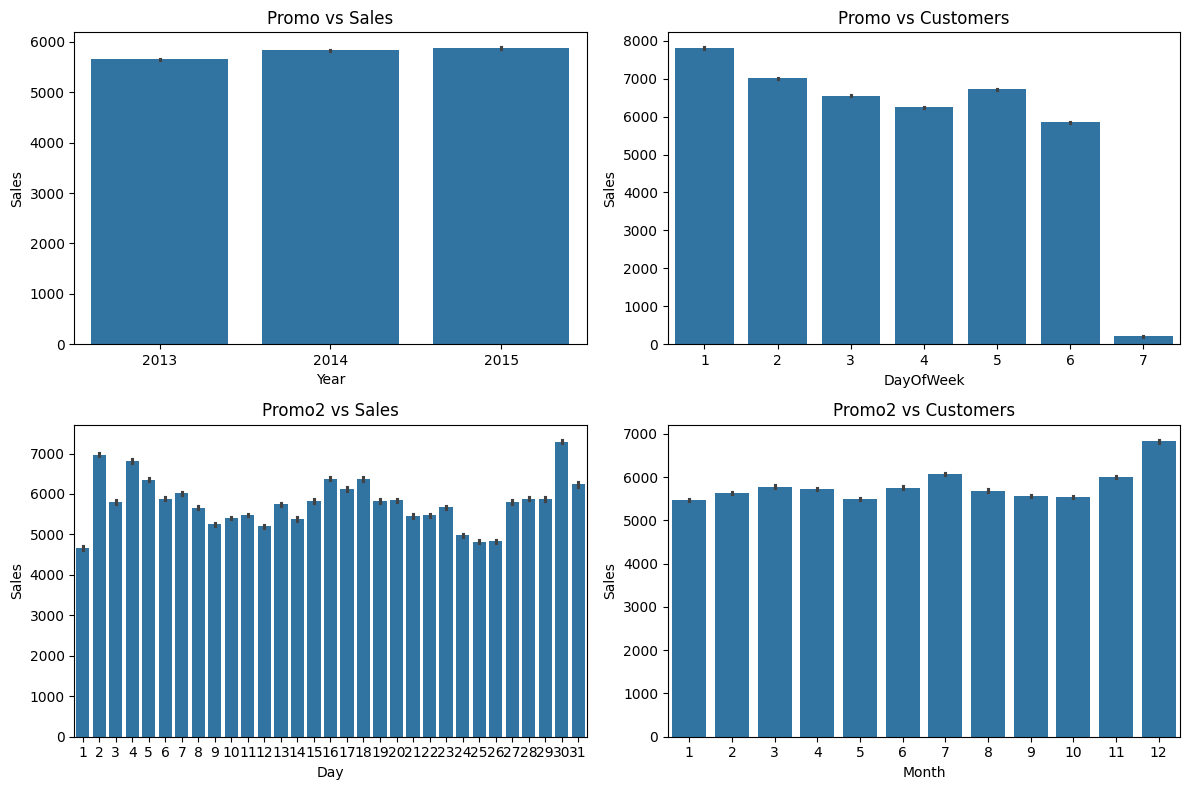

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1
sns.barplot(data=merged_train_and_store, x='Year', y='Sales', ax=axes[0, 0])
axes[0, 0].set_title('Promo vs Sales')

# Plot 2
sns.barplot(data=merged_train_and_store, x='DayOfWeek', y='Sales', ax=axes[0, 1])
axes[0, 1].set_title('Promo vs Customers')

# Plot 3
sns.barplot(data=merged_train_and_store, x='Day', y='Sales', ax=axes[1, 0])
axes[1, 0].set_title('Promo2 vs Sales')

# Plot 4
sns.barplot(data=merged_train_and_store, x='Month', y='Sales', ax=axes[1, 1])
axes[1, 1].set_title('Promo2 vs Customers')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [34]:
average_sales_by_DayOfWeek = merged_train_and_store.groupby(["DayOfWeek"])[["Sales", "Customers"]].mean().reset_index()
average_sales_by_DayOfWeek

,DayOfWeek,Sales,Customers
0,1,7809.044510,813.065791
1,2,7005.244467,760.984615
2,3,6555.884138,721.639666
3,4,6247.575913,697.541486
4,5,6723.274305,743.150742
5,6,5847.562599,657.112237
6,7,204.183189,35.786817


In [35]:
average_sales_by_month = merged_train_and_store.groupby(["Month"])[["Sales", "Customers"]].mean().reset_index()
average_sales_by_month

,Month,Sales,Customers
0,1,5465.395529,601.617172
1,2,5645.253150,626.715129
2,3,5784.578871,629.401958
3,4,5738.866916,630.612945
4,5,5489.639973,601.991263
5,6,5760.964375,624.794091
6,7,6064.915711,656.629781
7,8,5693.016554,642.496979
8,9,5570.246033,634.438699
9,10,5537.037419,631.095987


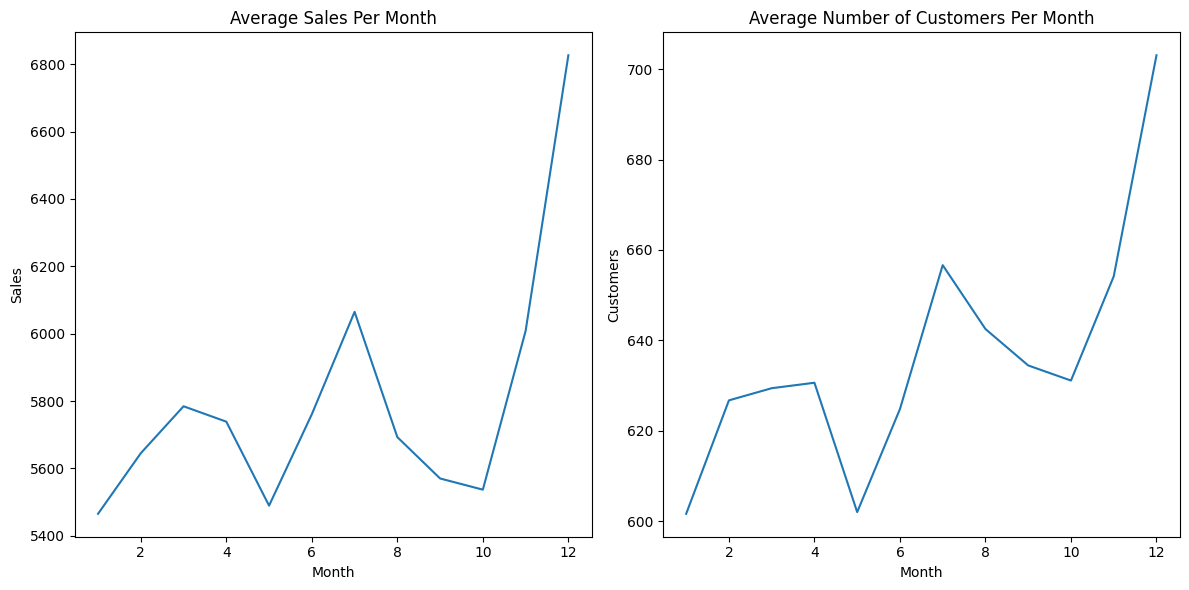

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
sns.lineplot(data=average_sales_by_month, x="Month", y="Sales", ax=axes[0])
axes[0].set_title('Average Sales Per Month')

# Plot 2
sns.lineplot(data=average_sales_by_month, x="Month", y="Customers", ax=axes[1])
axes[1].set_title('Average Number of Customers Per Month')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

This basically tells us that there are certain peaks occurring at specific times. One peak is around March (i.e. closer to Easter), One Peak is around July (i.e. Summer holidays), and then the biggest peak occurs around December (i.e. Winter time and chances of getting ill are higher).

In [37]:
average_sales_by_day = merged_train_and_store.groupby(["Day"])[["Sales", "Customers"]].mean().reset_index()
average_sales_by_day.head()

,Day,Sales,Customers
0,1,4658.450603,489.512603
1,2,6973.664895,735.431686
2,3,5811.044109,612.213499
3,4,6818.008362,720.971181
4,5,6357.150246,675.477199


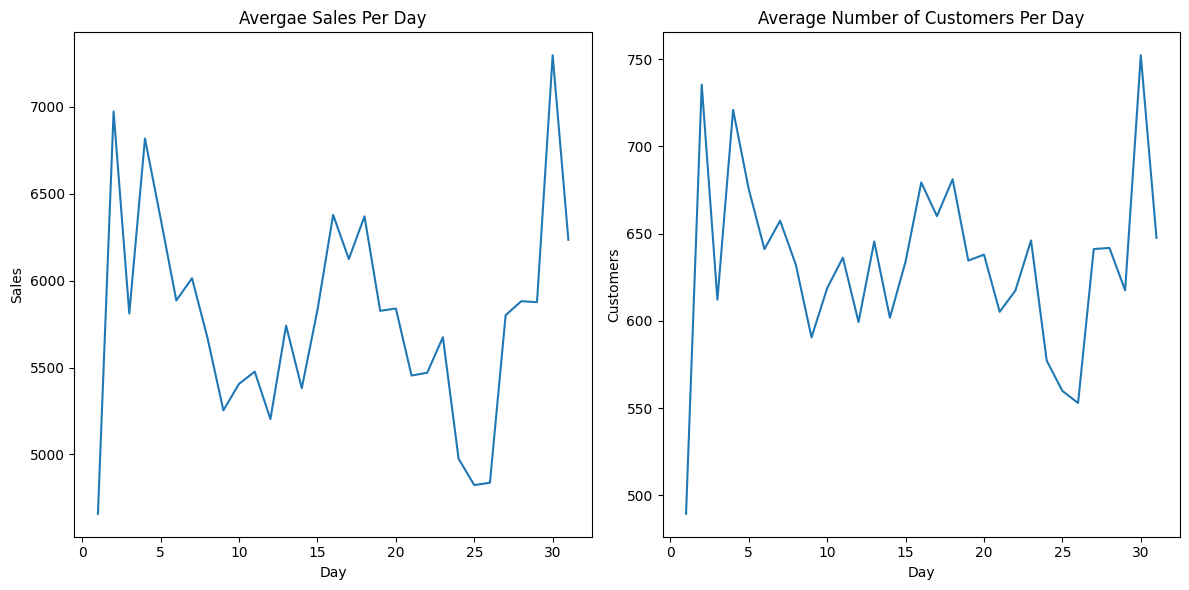

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
sns.lineplot(data=average_sales_by_day, x="Day", y="Sales", ax=axes[0])
axes[0].set_title('Avergae Sales Per Day')

# Plot 2
sns.lineplot(data=average_sales_by_day, x="Day", y="Customers", ax=axes[1])
axes[1].set_title('Average Number of Customers Per Day')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

We can see peaks at roughly the end of the months and the start of the months suggesting the time when salaries are received is usually when there are more expenditures

In [39]:
average_sales_by_week = merged_train_and_store.groupby(["WeekofYear"])[["Sales", "Customers"]].mean().reset_index()
average_sales_by_week.head()

,WeekofYear,Sales,Customers
0,1,4339.044625,496.875730
1,2,6354.031219,661.482212
2,3,5111.601025,586.255178
3,4,5595.613496,610.643861
4,5,5463.895836,606.236899


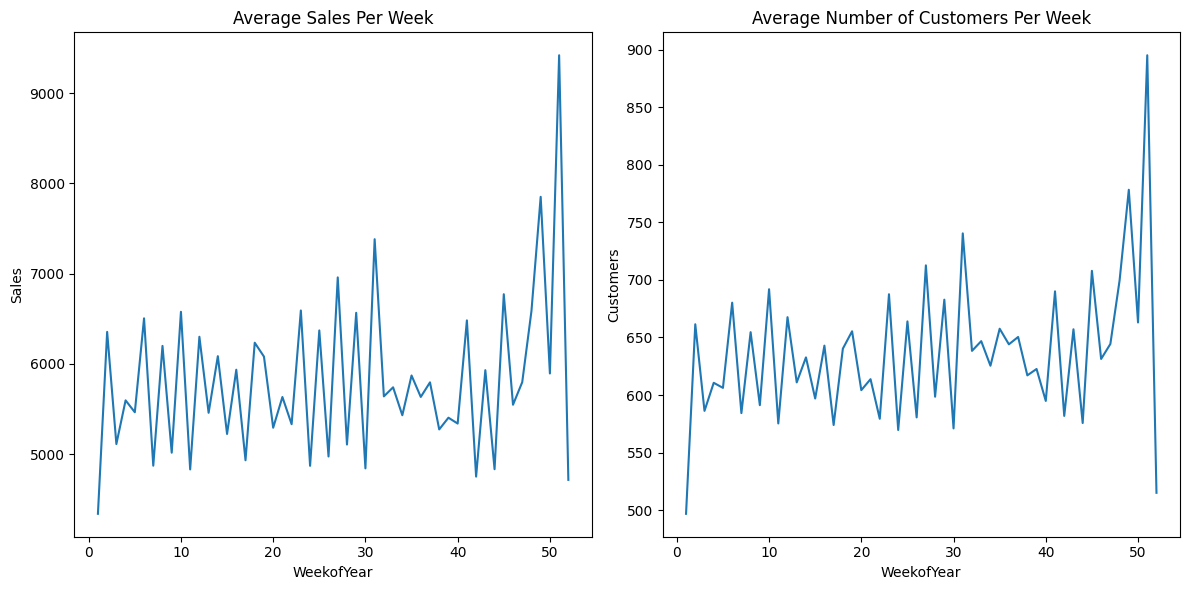

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
sns.lineplot(data=average_sales_by_week, x="WeekofYear", y="Sales", ax=axes[0])
axes[0].set_title('Average Sales Per Week')

# Plot 2
sns.lineplot(data=average_sales_by_week, x="WeekofYear", y="Customers", ax=axes[1])
axes[1].set_title('Average Number of Customers Per Week')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Similar to the average sale by months we can see larger spike at the end of the year.

## Feature Engineering

In [41]:
merged_train_and_store['Open'].value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [42]:
merged_train_and_store[merged_train_and_store['Open'] == 0].Sales.unique

<bound method Series.unique of 291        0
875        0
1406       0
1990       0
2521       0
          ..
1017204    0
1017205    0
1017206    0
1017207    0
1017208    0
Name: Sales, Length: 172817, dtype: int64>

We can see that sales has all 0 values for when the store is not open. So it would be safe to not include the instances of when the store is not open.

In [43]:
training_df = merged_train_and_store[merged_train_and_store['Open'] == 1].copy()
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64     

In [44]:
pd.set_option("display.max_columns", 120)
training_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekofYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


In [45]:
#Functions to create new columns
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekofYear - df.Promo2SinceWeek)*7/30.5  #Average of 30 and 31 days
    df['Promo2Open'].fillna(0, inplace =True) 
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [46]:
promo_cols(training_df)

C:\Users\msala\AppData\Local\Temp\ipykernel_26628\3799244187.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Promo2Open'].fillna(0, inplace =True)


In [47]:
#CompOpenSince: Months since the competition store has been open
def comp_months(df):
    df['CompOpenSince'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompOpenSince'] = df['CompOpenSince'].map(lambda x: 0 if x < 0 else x).fillna(0) #to account for the negative values we will get for stores built in future

In [48]:
comp_months(training_df)

In [49]:
training_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekofYear,Promo2Open,IsPromo2Month,CompOpenSince
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,0.000000,0,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,64.131148,1,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,51.901639,1,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,0.000000,0,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,0.000000,0,3.0


In [50]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64     

## Data Preprocessing

In [51]:
input_cols=['Store', 'DayOfWeek', 'Promo', 'Open',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'Year', 'Month', 'Day',
       'WeekofYear', 'CompOpenSince', 'Promo2Open', 'IsPromo2Month']
target_cols= ['Sales', 'Customers']

In [52]:
training_df['Store'] = training_df['Store'].astype(str)
training_df['DayOfWeek'] = training_df['DayOfWeek'].astype(str)
training_df['StateHoliday'] = training_df['StateHoliday'].astype(str)
training_df['StoreType'] = training_df['StoreType'].astype(str)
training_df['Assortment'] = training_df['Assortment'].astype(str)
training_df['Day'] = training_df['Day'].astype(str)
training_df['Promo'] = training_df['Promo'].astype(str)
training_df['Promo2'] = training_df['Promo2'].astype(str)
training_df['IsPromo2Month'] = training_df['IsPromo2Month'].astype(str)

In [53]:
inputs = training_df[input_cols].copy()

target = training_df[target_cols].copy()

In [54]:
#Missing Values in Numerical columns
max_dist= training_df.CompetitionDistance.max()
inputs['CompetitionDistance'].fillna(2*max_dist, inplace=True)

C:\Users\msala\AppData\Local\Temp\ipykernel_26628\1631759790.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inputs['CompetitionDistance'].fillna(2*max_dist, inplace=True)


In [55]:
#Numeric and Categorical columns
numeric_cols = ['SchoolHoliday',
              'CompetitionDistance', 'CompOpenSince', 'Promo2Open',
               'Month', 'Year', 'WeekofYear']
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'IsPromo2Month', 'Promo2', 'Promo']

In [56]:
inputs[numeric_cols].isna().sum()

SchoolHoliday          0
CompetitionDistance    0
CompOpenSince          0
Promo2Open             0
Month                  0
Year                   0
WeekofYear             0
dtype: int64

Let's assume that for the stores with null Competition Distance, there are no competition stores as they are very far away. I have added another column for whether a store has competition or not.

In [57]:
inputs[categorical_cols].isna().sum()

DayOfWeek        0
StateHoliday     0
StoreType        0
Assortment       0
Day              0
IsPromo2Month    0
Promo2           0
Promo            0
dtype: int64

There are no catergorical columns with missing values.

!pip install scikit-learn

In [58]:
#Scaling Numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols]=scaler.transform(inputs[numeric_cols])
inputs[numeric_cols].describe().loc[['min', 'max']]

,SchoolHoliday,CompetitionDistance,CompOpenSince,Promo2Open,Month,Year,WeekofYear
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [59]:
#Encoding Categorical Columns
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(sparse_output=False).fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs[encoded_cols]=encoder.transform(inputs[categorical_cols])

In [60]:
#Define the final input for the training and test set
X= inputs[numeric_cols+encoded_cols]

In [61]:
X.head()

,SchoolHoliday,CompetitionDistance,CompOpenSince,Promo2Open,Month,Year,WeekofYear,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Day_1,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_2,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_3,Day_30,Day_31,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,IsPromo2Month_0,IsPromo2Month_1,Promo2_0,Promo2_1,Promo_0,Promo_1
0,1.0,0.008240,0.059163,0.000000,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.003626,0.066378,0.890710,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.093013,0.074315,0.720856,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.003955,0.050505,0.000000,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.197034,0.002165,0.000000,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## Linear Regression Model

In [62]:
#Splitting the original training data into training and Validation set
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y= train_test_split(X, training_df[['Sales', 'Customers']], test_size=0.2, random_state=32)

In [63]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression().fit(train_X, train_y)

predictions_train=linear_regression_model.predict(train_X)
predictions_val= linear_regression_model.predict(val_X)

In [64]:
# Calculating RMSE separately for 'Sales' and 'Customers'
from sklearn.metrics import mean_squared_error

rmse_train_sales = mean_squared_error(predictions_train[:, 0], train_y['Sales'], squared=False)
rmse_val_sales = mean_squared_error(predictions_val[:, 0], val_y['Sales'], squared=False)

rmse_train_customers = mean_squared_error(predictions_train[:, 1], train_y['Customers'], squared=False)
rmse_val_customers = mean_squared_error(predictions_val[:, 1], val_y['Customers'], squared=False)

print(f"Training Error - Sales: {rmse_train_sales}   \nValidation Error - Sales: {rmse_val_sales}")
print(f"Training Error - Customers: {rmse_train_customers}   \nValidation Error - Customers: {rmse_val_customers}")

Training Error - Sales: 2699.104114438699   
Validation Error - Sales: 2708.4041690164513
Training Error - Customers: 329.01523335722675   
Validation Error - Customers: 329.12472835442793


C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

In [65]:
# Calculate Percentage Error for 'Sales' and 'Customers'
percentage_error_train_sales = np.where(train_y['Sales'] == 0, 0, ((predictions_train[:, 0] - train_y['Sales']) / train_y['Sales']) * 100)
percentage_error_val_sales = np.where(val_y['Sales'] == 0, 0, ((predictions_val[:, 0] - val_y['Sales']) / val_y['Sales']) * 100)

percentage_error_train_customers = np.where(train_y['Customers'] == 0, 0, ((predictions_train[:, 1] - train_y['Customers']) / train_y['Customers']) * 100)
percentage_error_val_customers = np.where(val_y['Customers'] == 0, 0, ((predictions_val[:, 1] - val_y['Customers']) / val_y['Customers']) * 100)

# Square the Percentage Errors
squared_percentage_error_train_sales = percentage_error_train_sales**2
squared_percentage_error_val_sales = percentage_error_val_sales**2

squared_percentage_error_train_customers = percentage_error_train_customers**2
squared_percentage_error_val_customers = percentage_error_val_customers**2

# Calculate Mean Squared Percentage Error (MSPE)
mspe_train_sales = squared_percentage_error_train_sales.mean()
mspe_val_sales = squared_percentage_error_val_sales.mean()

mspe_train_customers = squared_percentage_error_train_customers.mean()
mspe_val_customers = squared_percentage_error_val_customers.mean()

# Calculate RMSPE
rmspe_train_sales = np.sqrt(mspe_train_sales)
rmspe_val_sales = np.sqrt(mspe_val_sales)

rmspe_train_customers = np.sqrt(mspe_train_customers)
rmspe_val_customers = np.sqrt(mspe_val_customers)

# Print the results
print(f"RMSPE - Sales: Training: {rmspe_train_sales}, Validation: {rmspe_val_sales}")
print(f"RMSPE - Customers: Training: {rmspe_train_customers}, Validation: {rmspe_val_customers}")

RMSPE - Sales: Training: 52.746755403098895, Validation: 49.741713689491235
RMSPE - Customers: Training: 79.42689700697801, Validation: 49.228799668144624


## Gradient Boosting

In [66]:
!pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\msala\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [67]:
from xgboost import XGBRegressor

In [68]:
xgb_model = XGBRegressor(random_state = 32, n_jobs = -1).fit(train_X,train_y)

In [69]:
predict_train = xgb_model.predict(train_X)
predict_val = xgb_model.predict(val_X)

In [70]:
rmse_train_sales = mean_squared_error(predict_train[:, 0], train_y['Sales'], squared=False)
rmse_val_sales = mean_squared_error(predict_val[:, 0], val_y['Sales'], squared=False)

rmse_train_customers = mean_squared_error(predict_train[:, 1], train_y['Customers'], squared=False)
rmse_val_customers = mean_squared_error(predict_val[:, 1], val_y['Customers'], squared=False)

print(f"Training Error - Sales: {rmse_train_sales}   \nValidation Error - Sales: {rmse_val_sales}")
print(f"Training Error - Customers: {rmse_train_customers}   \nValidation Error - Customers: {rmse_val_customers}")

Training Error - Sales: 1503.8349057003143   
Validation Error - Sales: 1525.8763599487042
Training Error - Customers: 157.6449950940421   
Validation Error - Customers: 159.02784285426276


C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

In [71]:
# Calculate Percentage Error for 'Sales' and 'Customers'
percentage_error_train_sales = np.where(train_y['Sales'] == 0, 0, ((predict_train[:, 0] - train_y['Sales']) / train_y['Sales']) * 100)
percentage_error_val_sales = np.where(val_y['Sales'] == 0, 0, ((predict_val[:, 0] - val_y['Sales']) / val_y['Sales']) * 100)

percentage_error_train_customers = np.where(train_y['Customers'] == 0, 0, ((predict_train[:, 1] - train_y['Customers']) / train_y['Customers']) * 100)
percentage_error_val_customers = np.where(val_y['Customers'] == 0, 0, ((predict_val[:, 1] - val_y['Customers']) / val_y['Customers']) * 100)

# Square the Percentage Errors
squared_percentage_error_train_sales = percentage_error_train_sales**2
squared_percentage_error_val_sales = percentage_error_val_sales**2

squared_percentage_error_train_customers = percentage_error_train_customers**2
squared_percentage_error_val_customers = percentage_error_val_customers**2

# Calculate Mean Squared Percentage Error (MSPE)
mspe_train_sales = squared_percentage_error_train_sales.mean()
mspe_val_sales = squared_percentage_error_val_sales.mean()

mspe_train_customers = squared_percentage_error_train_customers.mean()
mspe_val_customers = squared_percentage_error_val_customers.mean()

# Calculate RMSPE
rmspe_train_sales = np.sqrt(mspe_train_sales)
rmspe_val_sales = np.sqrt(mspe_val_sales)

rmspe_train_customers = np.sqrt(mspe_train_customers)
rmspe_val_customers = np.sqrt(mspe_val_customers)

# Print the results
print(f"RMSPE - Sales: Training: {rmspe_train_sales}, Validation: {rmspe_val_sales}")
print(f"RMSPE - Customers: Training: {rmspe_train_customers}, Validation: {rmspe_val_customers}")

RMSPE - Sales: Training: 30.869372639914097, Validation: 27.02594587806375
RMSPE - Customers: Training: 56.81849844095801, Validation: 25.117823400582555


In [72]:
def best_params(**params):
    model_X_sales = XGBRegressor(**params, random_state=32, n_jobs=-1).fit(train_X, train_y['Sales'])
    model_X_customers = XGBRegressor(**params, random_state=32, n_jobs=-1).fit(train_X, train_y['Customers'])

    predict_train_sales = model_X_sales.predict(train_X)
    predict_val_sales = model_X_sales.predict(val_X)
    rmse_train_sales = mean_squared_error(predict_train_sales, train_y['Sales'], squared=False)
    rmse_val_sales = mean_squared_error(predict_val_sales, val_y['Sales'], squared=False)

    predict_train_customers = model_X_customers.predict(train_X)
    predict_val_customers = model_X_customers.predict(val_X)
    rmse_train_customers = mean_squared_error(predict_train_customers, train_y['Customers'], squared=False)
    rmse_val_customers = mean_squared_error(predict_val_customers, val_y['Customers'], squared=False)

    print("With Hyperparameter tuning - Sales:")
    print(f"Training Error: {rmse_train_sales}\nValidation Error: {rmse_val_sales}")

    print("\nWith Hyperparameter tuning - Customers:")
    print(f"Training Error: {rmse_train_customers}\nValidation Error: {rmse_val_customers}")

# Fitting with best parameters (Manually tried different combinations of parameters)
best_params(n_estimators=350, max_depth=12, learning_rate=0.1, subsample=0.75, colsample_bytree=0.77)


C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


With Hyperparameter tuning - Sales:
Training Error: 630.8781740932741
Validation Error: 864.919334590596

With Hyperparameter tuning - Customers:
Training Error: 64.46160075592451
Validation Error: 88.30011383301809


C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
xgb_model_best = XGBRegressor(n_estimators=350, max_depth=12, learning_rate=0.1, subsample=0.75, colsample_bytree=0.77, 
                         random_state = 32, n_jobs = -1).fit(train_X,train_y)

In [74]:
predict_train_best = xgb_model_best.predict(train_X)
predict_val_best = xgb_model_best.predict(val_X)

In [75]:
rmse_train_sales = mean_squared_error(predict_train_best[:, 0], train_y['Sales'], squared=False)
rmse_val_sales = mean_squared_error(predict_val_best[:, 0], val_y['Sales'], squared=False)

rmse_train_customers = mean_squared_error(predict_train_best[:, 1], train_y['Customers'], squared=False)
rmse_val_customers = mean_squared_error(predict_val_best[:, 1], val_y['Customers'], squared=False)

print(f"Training Error - Sales: {rmse_train_sales}   \nValidation Error - Sales: {rmse_val_sales}")
print(f"Training Error - Customers: {rmse_train_customers}   \nValidation Error - Customers: {rmse_val_customers}")

Training Error - Sales: 633.5052915464603   
Validation Error - Sales: 867.5666084231412
Training Error - Customers: 65.27534810992387   
Validation Error - Customers: 88.58142598103343


C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\msala\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

In [76]:
# Calculate Percentage Error for 'Sales' and 'Customers'
percentage_error_train_sales = np.where(train_y['Sales'] == 0, 0, ((predict_train_best[:, 0] - train_y['Sales']) / train_y['Sales']) * 100)
percentage_error_val_sales = np.where(val_y['Sales'] == 0, 0, ((predict_val_best[:, 0] - val_y['Sales']) / val_y['Sales']) * 100)

percentage_error_train_customers = np.where(train_y['Customers'] == 0, 0, ((predict_train_best[:, 1] - train_y['Customers']) / train_y['Customers']) * 100)
percentage_error_val_customers = np.where(val_y['Customers'] == 0, 0, ((predict_val_best[:, 1] - val_y['Customers']) / val_y['Customers']) * 100)

# Square the Percentage Errors
squared_percentage_error_train_sales = percentage_error_train_sales**2
squared_percentage_error_val_sales = percentage_error_val_sales**2

squared_percentage_error_train_customers = percentage_error_train_customers**2
squared_percentage_error_val_customers = percentage_error_val_customers**2

# Calculate Mean Squared Percentage Error (MSPE)
mspe_train_sales = squared_percentage_error_train_sales.mean()
mspe_val_sales = squared_percentage_error_val_sales.mean()

mspe_train_customers = squared_percentage_error_train_customers.mean()
mspe_val_customers = squared_percentage_error_val_customers.mean()

# Calculate RMSPE
rmspe_train_sales = np.sqrt(mspe_train_sales)
rmspe_val_sales = np.sqrt(mspe_val_sales)

rmspe_train_customers = np.sqrt(mspe_train_customers)
rmspe_val_customers = np.sqrt(mspe_val_customers)

# Print the results
print(f"RMSPE - Sales: Training: {rmspe_train_sales}, Validation: {rmspe_val_sales}")
print(f"RMSPE - Customers: Training: {rmspe_train_customers}, Validation: {rmspe_val_customers}")

RMSPE - Sales: Training: 15.476336436404567, Validation: 15.204804667135479
RMSPE - Customers: Training: 30.369377740569746, Validation: 13.77735637320056


We are getting an RMSPE of 0.15205 Validation error through the XGBoost Regressor for the Sales and and RMSPE of 0.13777 for the customers.

## Applying Model on the Test Set

In [77]:
merged_test_and_store = test.merge(store, how = "left", on = "Store")
merged_test_and_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [78]:
print(test.shape, merged_test_and_store.shape)

(41088, 9) (41088, 18)


In [79]:
stores_with_promo_test = merged_test_and_store[merged_test_and_store.Promo == 1]

print(stores_with_promo_test.shape, (stores_with_promo_test.shape[0]/merged_test_and_store.shape[0])*100)

(16264, 18) 39.58333333333333


In [80]:
stores_with_promo2_test = merged_test_and_store[merged_test_and_store.Promo2 == 1]

print(stores_with_promo2_test.shape, (stores_with_promo2_test.shape[0]/merged_test_and_store.shape[0])*100)

(23856, 18) 58.0607476635514


In [81]:
merged_test_and_store[merged_test_and_store.Open == 0].shape

(5984, 18)

In [82]:
split_date(merged_test_and_store)

In [83]:
merged_test_and_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41088 non-null  int64         
 1   DayOfWeek                  41088 non-null  int64         
 2   Date                       41088 non-null  datetime64[ns]
 3   Sales                      0 non-null      float64       
 4   Customers                  0 non-null      float64       
 5   Open                       41077 non-null  float64       
 6   Promo                      41088 non-null  int64         
 7   StateHoliday               41088 non-null  object        
 8   SchoolHoliday              41088 non-null  int64         
 9   StoreType                  41088 non-null  object        
 10  Assortment                 41088 non-null  object        
 11  CompetitionDistance        40992 non-null  float64       
 12  Comp

In [84]:
# Replace NaN values in 'Sales' and 'Customers' with 0 where 'Open' is 0
merged_test_and_store.loc[merged_test_and_store['Open'] == 0, ['Sales', 'Customers']] = merged_test_and_store.loc[merged_test_and_store['Open'] == 0, ['Sales', 'Customers']].fillna(0)

In [85]:
merged_test_and_store[merged_test_and_store.Open == 0].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekofYear
543,703,4,2015-09-17,0.0,0.0,0.0,1,0,0,a,a,80.0,6.0,2005.0,0,NaN,NaN,NaN,2015,9,17,38
676,879,4,2015-09-17,0.0,0.0,0.0,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",2015,9,17,38
840,1097,4,2015-09-17,0.0,0.0,0.0,1,0,0,b,b,720.0,3.0,2002.0,0,NaN,NaN,NaN,2015,9,17,38
1399,703,3,2015-09-16,0.0,0.0,0.0,1,0,0,a,a,80.0,6.0,2005.0,0,NaN,NaN,NaN,2015,9,16,38
1532,879,3,2015-09-16,0.0,0.0,0.0,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",2015,9,16,38


In [86]:
testing_df = merged_test_and_store[merged_test_and_store.Open == 1].copy()

In [87]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35093 entries, 0 to 41087
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      35093 non-null  int64         
 1   DayOfWeek                  35093 non-null  int64         
 2   Date                       35093 non-null  datetime64[ns]
 3   Sales                      0 non-null      float64       
 4   Customers                  0 non-null      float64       
 5   Open                       35093 non-null  float64       
 6   Promo                      35093 non-null  int64         
 7   StateHoliday               35093 non-null  object        
 8   SchoolHoliday              35093 non-null  int64         
 9   StoreType                  35093 non-null  object        
 10  Assortment                 35093 non-null  object        
 11  CompetitionDistance        35028 non-null  float64       
 12  Competiti

In [88]:
promo_cols(testing_df)

C:\Users\msala\AppData\Local\Temp\ipykernel_26628\3799244187.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Promo2Open'].fillna(0, inplace =True)


In [89]:
comp_months(testing_df)

In [90]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35093 entries, 0 to 41087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      35093 non-null  int64         
 1   DayOfWeek                  35093 non-null  int64         
 2   Date                       35093 non-null  datetime64[ns]
 3   Sales                      0 non-null      float64       
 4   Customers                  0 non-null      float64       
 5   Open                       35093 non-null  float64       
 6   Promo                      35093 non-null  int64         
 7   StateHoliday               35093 non-null  object        
 8   SchoolHoliday              35093 non-null  int64         
 9   StoreType                  35093 non-null  object        
 10  Assortment                 35093 non-null  object        
 11  CompetitionDistance        35028 non-null  float64       
 12  Competiti

In [91]:
input_cols=['Store', 'DayOfWeek', 'Promo', 'Open',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'Year', 'Month', 'Day',
       'WeekofYear', 'CompOpenSince', 'Promo2Open', 'IsPromo2Month']
target_cols= ['Sales', 'Customers']


testing_df['Store'] = testing_df['Store'].astype(str)
testing_df['DayOfWeek'] = testing_df['DayOfWeek'].astype(str)
testing_df['StateHoliday'] = testing_df['StateHoliday'].astype(str)
testing_df['StoreType'] = testing_df['StoreType'].astype(str)
testing_df['Assortment'] = testing_df['Assortment'].astype(str)
testing_df['Day'] = testing_df['Day'].astype(str)
testing_df['Promo'] = testing_df['Promo'].astype(str)
testing_df['Promo2'] = testing_df['Promo2'].astype(str)
testing_df['IsPromo2Month'] = testing_df['IsPromo2Month'].astype(str)

In [92]:
inputs = testing_df[input_cols].copy()

target = testing_df[target_cols].copy()

In [93]:
#Missing Values in Numerical columns
max_dist= training_df.CompetitionDistance.max()
inputs['CompetitionDistance'].fillna(2*max_dist, inplace=True)

C:\Users\msala\AppData\Local\Temp\ipykernel_26628\1631759790.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inputs['CompetitionDistance'].fillna(2*max_dist, inplace=True)


In [94]:
#Numeric and Categorical columns
numeric_cols = ['SchoolHoliday',
              'CompetitionDistance', 'CompOpenSince', 'Promo2Open',
               'Month', 'Year', 'WeekofYear']
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'IsPromo2Month', 'Promo2', 'Promo']


In [95]:
inputs[numeric_cols].isna().sum()

SchoolHoliday          0
CompetitionDistance    0
CompOpenSince          0
Promo2Open             0
Month                  0
Year                   0
WeekofYear             0
dtype: int64

In [96]:
inputs[categorical_cols].isna().sum()

DayOfWeek        0
StateHoliday     0
StoreType        0
Assortment       0
Day              0
IsPromo2Month    0
Promo2           0
Promo            0
dtype: int64

In [97]:
#Scaling Numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols]=scaler.transform(inputs[numeric_cols])
inputs[numeric_cols].describe().loc[['min', 'max']]

,SchoolHoliday,CompetitionDistance,CompOpenSince,Promo2Open,Month,Year,WeekofYear
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [98]:
#Encoding Categorical Columns
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(sparse_output=False).fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs[encoded_cols]=encoder.transform(inputs[categorical_cols])

In [99]:
test_X= inputs[numeric_cols+encoded_cols]

In [100]:
test_X.head()

,SchoolHoliday,CompetitionDistance,CompOpenSince,Promo2Open,Month,Year,WeekofYear,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Day_1,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_2,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_3,Day_30,Day_31,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,IsPromo2Month_0,IsPromo2Month_1,Promo2_0,Promo2_1,Promo_0,Promo_1
0,0.0,0.008240,0.060519,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.093013,0.075648,0.726949,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.158075,0.020893,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.049440,0.007925,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.013250,0.130403,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


expected StateHoliday_c, StateHoliday_b in input data is missing which means that it is not there. I think since it is not there we can add the columns for it and give it a value of 0 as they are not there.

In [101]:
test_X['StateHoliday_b'] = 0
test_X['StateHoliday_c'] = 0

C:\Users\msala\AppData\Local\Temp\ipykernel_26628\1712463178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['StateHoliday_b'] = 0
C:\Users\msala\AppData\Local\Temp\ipykernel_26628\1712463178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['StateHoliday_c'] = 0


In [102]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35093 entries, 0 to 41087
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SchoolHoliday        35093 non-null  float64
 1   CompetitionDistance  35093 non-null  float64
 2   CompOpenSince        35093 non-null  float64
 3   Promo2Open           35093 non-null  float64
 4   Month                35093 non-null  float64
 5   Year                 35093 non-null  float64
 6   WeekofYear           35093 non-null  float64
 7   DayOfWeek_1          35093 non-null  float64
 8   DayOfWeek_2          35093 non-null  float64
 9   DayOfWeek_3          35093 non-null  float64
 10  DayOfWeek_4          35093 non-null  float64
 11  DayOfWeek_5          35093 non-null  float64
 12  DayOfWeek_6          35093 non-null  float64
 13  DayOfWeek_7          35093 non-null  float64
 14  StateHoliday_0       35093 non-null  float64
 15  StateHoliday_a       35093 non-null  floa

In [103]:
test_X.columns

Index(['SchoolHoliday', 'CompetitionDistance', 'CompOpenSince', 'Promo2Open',
       'Month', 'Year', 'WeekofYear', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'StateHoliday_0', 'StateHoliday_a', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'Day_1', 'Day_10', 'Day_11', 'Day_12',
       'Day_13', 'Day_14', 'Day_15', 'Day_16', 'Day_17', 'Day_18', 'Day_19',
       'Day_2', 'Day_20', 'Day_21', 'Day_22', 'Day_23', 'Day_24', 'Day_25',
       'Day_26', 'Day_27', 'Day_28', 'Day_29', 'Day_3', 'Day_30', 'Day_31',
       'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8', 'Day_9', 'IsPromo2Month_0',
       'IsPromo2Month_1', 'Promo2_0', 'Promo2_1', 'Promo_0', 'Promo_1',
       'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [104]:
new_order = ['SchoolHoliday', 'CompetitionDistance', 'CompOpenSince', 'Promo2Open',
       'Month', 'Year', 'WeekofYear', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'StateHoliday_0', 'StateHoliday_a','StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'Day_1', 'Day_10', 'Day_11', 'Day_12',
       'Day_13', 'Day_14', 'Day_15', 'Day_16', 'Day_17', 'Day_18', 'Day_19',
       'Day_2', 'Day_20', 'Day_21', 'Day_22', 'Day_23', 'Day_24', 'Day_25',
       'Day_26', 'Day_27', 'Day_28', 'Day_29', 'Day_3', 'Day_30', 'Day_31',
       'Day_4', 'Day_5', 'Day_6', 'Day_7', 'Day_8', 'Day_9', 'IsPromo2Month_0',
       'IsPromo2Month_1', 'Promo2_0', 'Promo2_1', 'Promo_0', 'Promo_1']

In [105]:
test_X = test_X[new_order]

In [106]:
predictions = xgb_model_best.predict(test_X)

In [107]:
testing_df['Sales'] = predictions[:, 0]  # Assuming the first column corresponds to 'Sales'
testing_df['Customers'] = predictions[:, 1]  # Assuming the second column corresponds to 'Customers'

# Display the updated test dataset
testing_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekofYear,Promo2Open,IsPromo2Month,CompOpenSince
0,1,4,2015-09-17,6861.840332,758.943787,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17,38,0.000000,0,84.0
1,3,4,2015-09-17,11445.172852,1066.879761,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,53.508197,0,105.0
2,7,4,2015-09-17,14204.903320,1296.479370,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17,38,0.000000,0,29.0
3,8,4,2015-09-17,8429.809570,936.932251,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17,38,0.000000,0,11.0
4,9,4,2015-09-17,9669.379883,732.243774,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17,38,0.000000,0,181.0
